HOST_RESPONSE_TIME:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales
 

In [1]:
import pandas as pd

# Cargar únicamente la columna 'id' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['host_response_time'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'id' existe en el DataFrame
if 'host_response_time' in data.columns:
    # Tipo de dato
    tipo_dato = data['host_response_time'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['host_response_time'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['host_response_time'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['host_response_time'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['host_response_time'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'host_response_time':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'host_response_time' no existe en el DataFrame.")

Columna 'host_response_time':
 - Tipo de dato: object
 - Cantidad de nulos: 128782
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 4
 - Cantidad de datos totales: 279712


C:\Users\mby30\AppData\Local\Temp\ipykernel_19856\1990767658.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, usecols=['host_response_time'], delimiter=',', encoding='latin-1')


ANALISIS CUALITATIVOS CON DATOS TOTALES

In [2]:
if 'host_response_time' in data.columns: 
    # Moda
    moda = data['host_response_time'].mode()[0]
    
    # Cantidad por variable
    cantidad_por_variable = data['host_response_time'].value_counts()
    
    # Porcentaje por variable
    porcentaje_por_variable = (cantidad_por_variable / cantidad_totales) * 100
    
    # Imprimir resultados formateados
    print(f"Columna 'host_response_time':")
    print(f" - Moda: {moda}\n")
    print(" - Cantidad por variable:")
    for valor, cantidad in cantidad_por_variable.items():
        print(f"   {valor}: {cantidad}")
    print("\n - Porcentaje por variable:")
    for valor, porcentaje in porcentaje_por_variable.items():
        print(f"   {valor}: {porcentaje:.2f}%")
else:
    print("La columna 'host_response_time' no existe en el DataFrame.")

Columna 'host_response_time':
 - Moda: within an hour

 - Cantidad por variable:
   within an hour: 83464
   within a few hours: 28891
   within a day: 23425
   a few days or more: 15150

 - Porcentaje por variable:
   within an hour: 29.84%
   within a few hours: 10.33%
   within a day: 8.37%
   a few days or more: 5.42%


ANALSIS CUALITATIVO CON DATOS VALIDOS

In [2]:
if 'host_response_time' in data.columns: 
    # Moda
    moda = data['host_response_time'].mode()[0]

    # Cantidad por variable
    cantidad_por_variable = data['host_response_time'].value_counts()

    # Calcular datos válidos (totales - nulos - vacíos)
    datos_validos = cantidad_totales - cantidad_nulos - cantidad_vacios

    # Porcentaje por variable usando solo datos válidos
    porcentaje_por_variable = (cantidad_por_variable / datos_validos) * 100

    # Imprimir resultados formateados
    print(f"Columna 'host_response_time':")
    print(f" - Moda: {moda}\n")
    print(" - Cantidad por variable:")
    for valor, cantidad in cantidad_por_variable.items():
        print(f"   {valor}: {cantidad}")
    
    print("\n - Porcentaje por variable (con base en datos válidos):")
    for valor, porcentaje in porcentaje_por_variable.items():
        print(f"   {valor}: {porcentaje:.2f}%")
else:
    print("La columna 'host_response_time' no existe en el DataFrame.")


Columna 'host_response_time':
 - Moda: within an hour

 - Cantidad por variable:
   within an hour: 83464
   within a few hours: 28891
   within a day: 23425
   a few days or more: 15150

 - Porcentaje por variable (con base en datos válidos):
   within an hour: 55.30%
   within a few hours: 19.14%
   within a day: 15.52%
   a few days or more: 10.04%


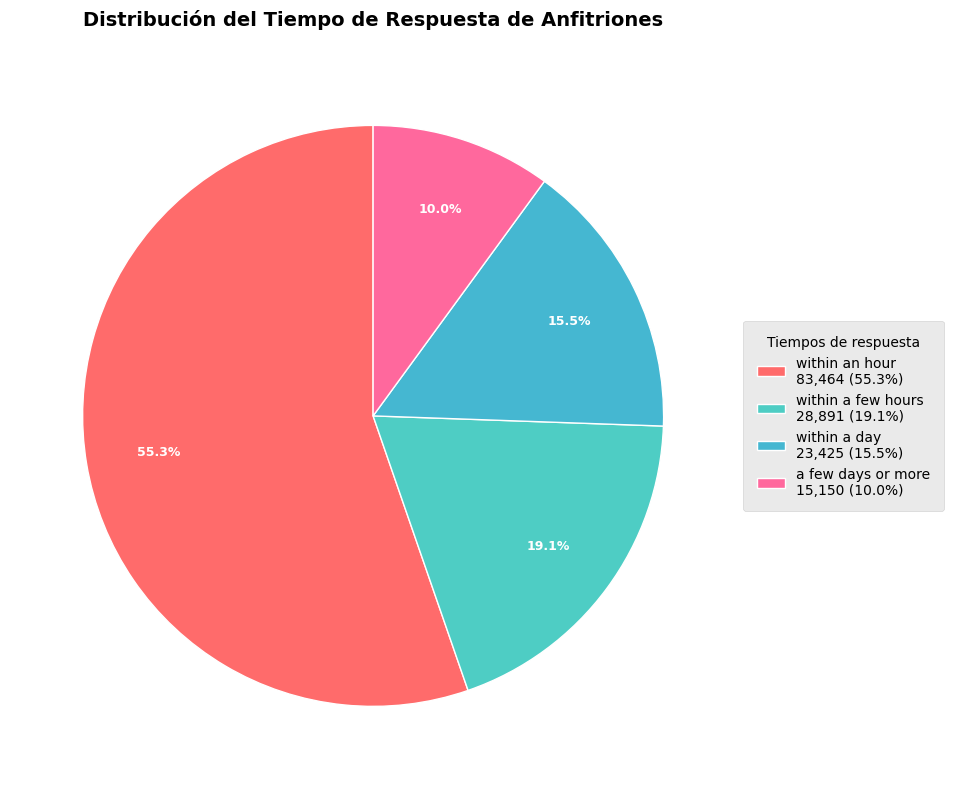

In [4]:
import matplotlib.pyplot as plt

if 'host_response_time' in data.columns:
    # 1. Limpiar datos: quitar nulos y vacíos
    data_validos = data['host_response_time'].dropna()
    data_validos = data_validos[data_validos != '']

    # 2. Calcular frecuencia y porcentaje directamente
    cantidad_por_variable = data_validos.value_counts()
    porcentajes = cantidad_por_variable / cantidad_por_variable.sum() * 100

    # 3. Colores dinámicos (tantos como categorías)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FF689D', '#FFA500', '#A8E6CF'][:len(cantidad_por_variable)]

    # 4. Crear gráfico
    fig, ax = plt.subplots(figsize=(12, 8))
    wedges, texts, autotexts = plt.pie(
        cantidad_por_variable,
        colors=colors,
        startangle=90,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        pctdistance=0.75,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 9, 'color': 'white', 'weight': 'bold'}
    )

    # Ajuste de texto para porcentajes pequeños
    if any(p < 3 for p in porcentajes):
        plt.setp([autotexts[i] for i, p in enumerate(porcentajes) if p < 3], color='black')

    # 5. Leyenda con etiquetas reales
    legend_labels = [f"{categoria}\n{cant:,} ({porc:.1f}%)"
                     for categoria, cant, porc in zip(cantidad_por_variable.index, cantidad_por_variable, porcentajes)]

    ax.legend(
        wedges,
        legend_labels,
        title="Tiempos de respuesta",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        borderpad=1
    )

    plt.title('Distribución del Tiempo de Respuesta de Anfitriones',
              fontsize=14, pad=20, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(right=0.7)
    plt.show()
else:
    print("La columna 'host_response_time' no existe en el DataFrame.")


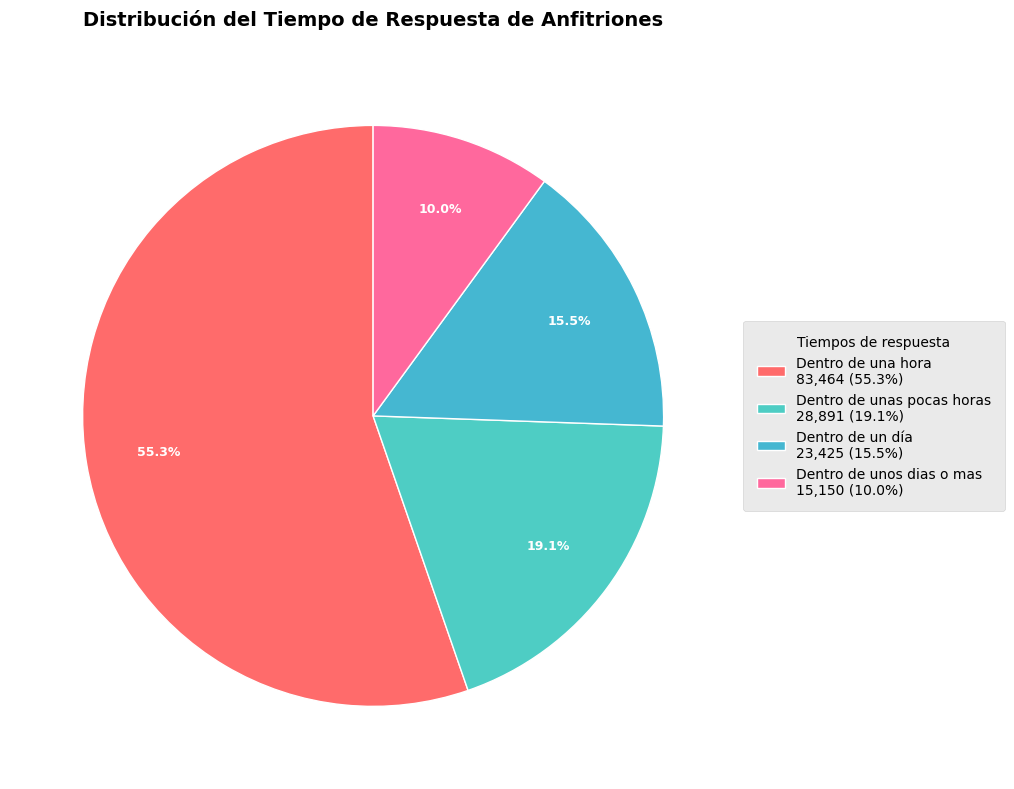

In [5]:
import matplotlib.pyplot as plt

if 'host_response_time' in data.columns:
    # Datos y configuración
    tiempos = ['Dentro de una hora', 'Dentro de unas pocas horas', 'Dentro de un día', 'Dentro de unos dias o mas']
    cantidad_por_variable = data['host_response_time'].value_counts()
    porcentajes = cantidad_por_variable/cantidad_por_variable.sum()*100
    
    # Configuración de estilo (como en tu ejemplo)
    plt.style.use('ggplot')
    plt.rcParams['font.size'] = 10
    
    # Paleta de colores mejorada (similar a tu esquema)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FF689D']  # Rosa para la última categoría
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Gráfico de torta (estilo idéntico a tu ejemplo)
    wedges, texts, autotexts = plt.pie(
        cantidad_por_variable,
        colors=colors,
        startangle=90,
        autopct=lambda p: f'{p:.1f}%',
        pctdistance=0.75,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 9, 'color': 'white', 'weight': 'bold'}
    )
    
    # Ajustar texto pequeño (si existe)
    if any(p < 3 for p in porcentajes):
        plt.setp([autotexts[i] for i, p in enumerate(porcentajes) if p < 3], color='black')
    
    # Leyenda detallada (como en tu ejemplo)
    legend_labels = [f"{t}\n{c:,} ({p:.1f}%)" for t, c, p in zip(tiempos, cantidad_por_variable, porcentajes)]
    ax.legend(
        wedges,
        legend_labels,
        title="Tiempos de respuesta",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        borderpad=1
    )
    
    # Título (mismo estilo)
    plt.title('Distribución del Tiempo de Respuesta de Anfitriones', 
              fontsize=14, pad=20, fontweight='bold')
    
    # Ajustes finales (idénticos)
    plt.tight_layout()
    plt.subplots_adjust(right=0.7)
    plt.show()